# Investigating Soccer Data on European Leagues, Match Outcomes, & Betting Odds

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#endnotes">Endnotes</a></li>
</ul>

<a id='intro'></a>
## Introduction

The dataset I've selected for this project is considered to be "The Ultimate Soccer Database". A huge soccer fan has compiled data from various sources; namely websites that provide scores, lineups, team formations, betting odds, and player/team attributes. The database has soccer data on over 25,000 matches, over 10,000 players, 11 European Countries and their soccer leagues, and betting odds & outcomes, from 2008 - 2016. The main dependent variable I am concerned with is match outcomes in the context of betting odds, as opposed to simply wins and losses by themselves. The questions I will be asking involve: **1) Which offensive attributes are correlated with teams that covered the spread? 2) Which defensive attributes are correlated with teams that covered the spread? 3) How do opposing attributes stack up to each other?**

In [2]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

sns.set_style('darkgrid')

<a id='wrangling'></a>
## Data Wrangling

The first thing I did was take a quick look at the data as an eye-test. It is stored in an SQLite database, so I viewed a UI of the tables using a 3rd party software called DB Browser. DB Browser also includes functionality to export tables to CSV files, so I exported all the tables I am concerned with into CSV files. Below, I show a few explorations of these tables. 

### General Properties

In [3]:
# Load my data tables into Pandas dataframes.
df_match = pd.read_csv('Match.csv')
df_team = pd.read_csv('Team.csv')
df_team_attr = pd.read_csv('Team_Attributes.csv')

Next, I will explore the dataframes one by one. Let's start with the match dataframe.

In [4]:
df_match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [5]:
df_match.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 115 columns):
id                  25979 non-null int64
country_id          25979 non-null int64
league_id           25979 non-null int64
season              25979 non-null object
stage               25979 non-null int64
date                25979 non-null object
match_api_id        25979 non-null int64
home_team_api_id    25979 non-null int64
away_team_api_id    25979 non-null int64
home_team_goal      25979 non-null int64
away_team_goal      25979 non-null int64
home_player_X1      24158 non-null float64
home_player_X2      24158 non-null float64
home_player_X3      24147 non-null float64
home_player_X4      24147 non-null float64
home_player_X5      24147 non-null float64
home_player_X6      24147 non-null float64
home_player_X7      24147 non-null float64
home_player_X8      24147 non-null float64
home_player_X9      24147 non-null float64
home_player_X10     24147 non-null float64
home_pl

In [6]:
df_match.shape

(25979, 115)

The match table is pretty complex. It has many columns, and has many null values also. Once I am done exploring, I will clean this table up for my needs. Next I'll explore the team table.

In [7]:
df_team.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [8]:
df_team.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
id                  299 non-null int64
team_api_id         299 non-null int64
team_fifa_api_id    288 non-null float64
team_long_name      299 non-null object
team_short_name     299 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB


In [9]:
df_team.shape

(299, 5)

The teams table has quite a few entries, but is relatively clean and easy to deal with. Lastly, let's explore the team attributes table.

In [10]:
df_team_attr.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [11]:
df_team_attr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
id                                1458 non-null int64
team_fifa_api_id                  1458 non-null int64
team_api_id                       1458 non-null int64
date                              1458 non-null object
buildUpPlaySpeed                  1458 non-null int64
buildUpPlaySpeedClass             1458 non-null object
buildUpPlayDribbling              489 non-null float64
buildUpPlayDribblingClass         1458 non-null object
buildUpPlayPassing                1458 non-null int64
buildUpPlayPassingClass           1458 non-null object
buildUpPlayPositioningClass       1458 non-null object
chanceCreationPassing             1458 non-null int64
chanceCreationPassingClass        1458 non-null object
chanceCreationCrossing            1458 non-null int64
chanceCreationCrossingClass       1458 non-null object
chanceCreationShooting            1458 non-null int64
chanceCreationShootin

In [12]:
df_team_attr.shape

(1458, 25)

This table is mostly clean already, and also straightforward. It describes skill and talent attributes of all the teams. These attributes were taken from FIFA video games created by EA Sports. The attributes may seem subjective to the casual reader, but EA Sports has huge teams of soccer experts who meticulously watch games & highlights weekly, carefully observing each player & team and assigning them ratings relative to each other's performances. (See https://www.fifagamenews.com/fifa-data-collected-interview/ .)

### Data Cleaning

Now I need to clean my data up to make analysis as easy as possible. I'll go step by step. From the team table, I'll get rid of the team_fifa_api_id and the team_short_name. The ID used to map a team to the EA Sports FIFA API, as well as a team's abbrevation, are not of any use to me so I'll cut these columns out for better performance. I'll get rid of the team_fifa_api_id in the team attributes also.

In [13]:
# Remove unnecessary columns from teams table and team attributes table
df_team.drop(columns=['team_fifa_api_id', 'team_short_name'], inplace=True)
df_team_attr.drop(columns=['team_fifa_api_id'], inplace=True)

# Print columns to confirm
print(df_team.columns)
print(df_team_attr.columns)

Index(['id', 'team_api_id', 'team_long_name'], dtype='object')
Index(['id', 'team_api_id', 'date', 'buildUpPlaySpeed',
       'buildUpPlaySpeedClass', 'buildUpPlayDribbling',
       'buildUpPlayDribblingClass', 'buildUpPlayPassing',
       'buildUpPlayPassingClass', 'buildUpPlayPositioningClass',
       'chanceCreationPassing', 'chanceCreationPassingClass',
       'chanceCreationCrossing', 'chanceCreationCrossingClass',
       'chanceCreationShooting', 'chanceCreationShootingClass',
       'chanceCreationPositioningClass', 'defencePressure',
       'defencePressureClass', 'defenceAggression', 'defenceAggressionClass',
       'defenceTeamWidth', 'defenceTeamWidthClass',
       'defenceDefenderLineClass'],
      dtype='object')


Next, I will do some cleaning up by date. Based on my observations in DBBrowser, there is too much of a mismatch between match data and team attributes data by specific dates. For example - there may be a match between two teams that occurred in 2008, but then the team attributes table doesn't even have attributes for either of those teams until 2010! To keep it simple, I will analyze only the most recent team attributes data - the data from 2015. That is done below.

In [14]:
# Use boolean mask to only keep team attributes from 2015, then get rid of the date column itself
in_2015_mask = df_team_attr['date'].str.contains('2015')
df_team_attr = df_team_attr[in_2015_mask]
df_team_attr.drop(columns=['date'], inplace=True)

# print a few columns to confirm
df_team_attr.head()

,id,team_api_id,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
2,3,9930,47,Balanced,41.0,Normal,54,Mixed,Organised,54,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
8,9,8485,59,Balanced,64.0,Normal,53,Mixed,Organised,51,...,63,Normal,Free Form,49,Medium,45,Press,63,Normal,Cover
14,15,8576,59,Balanced,57.0,Normal,52,Mixed,Organised,48,...,52,Normal,Organised,38,Medium,47,Press,53,Normal,Cover
20,21,8564,48,Balanced,70.0,Lots,52,Mixed,Organised,66,...,69,Lots,Organised,58,Medium,57,Press,49,Normal,Cover
26,27,10215,53,Balanced,53.0,Normal,44,Mixed,Organised,55,...,60,Normal,Organised,39,Medium,38,Press,61,Normal,Cover


The match table will be a little bit more complicated to clean up. First, I'll remove any column related to players and lineups. I am concerned with teams, their attributes, betting odds, and match outcomes, not individual players. Also, betting odds from 13 different sports books are provided. From personal experience, I know that the variation of betting odds among different sportsbooks is not great enough to warrant keeping all of this data in my calculations. Plus, the betting odds for some of the sportsbooks are missing entries for thousands of matches. For these reasons, I am going to get rid of all the betting odds except the ones from BET365, the most popular & most complete collection.

In [15]:
# Get rid of any columns involving players in the matches table
non_player_cols = [c for c in df_match.columns if "player" not in c]
df_match = df_match[non_player_cols]

# Get rid of all betting odds except BET365's odds in the matches table
df_match.drop(columns=['BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA',
       'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'SJH', 'SJD', 'SJA', 'VCH',
       'VCD', 'VCA', 'GBH', 'GBD', 'GBA', 'BSH', 'BSD', 'BSA'], inplace=True)

# Print columns to confirm
print(df_match.columns)

Index(['id', 'country_id', 'league_id', 'season', 'stage', 'date',
       'match_api_id', 'home_team_api_id', 'away_team_api_id',
       'home_team_goal', 'away_team_goal', 'goal', 'shoton', 'shotoff',
       'foulcommit', 'card', 'cross', 'corner', 'possession', 'B365H', 'B365D',
       'B365A'],
      dtype='object')


Next, I will do the same simple date mask that I applied onto the team attributes table. I only want matches that occurred in either the 2014/2015 season or the 2015/2016 season.

In [16]:
# Use boolean mask to only keep matches from 2014/2015 and 2015/2016
in_2015_mask = df_match['season'].str.contains('2015')
df_match = df_match[in_2015_mask]

# print a few columns to confirm
df_match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A
1248,1249,1,1,2014/2015,1,2014-07-25 00:00:00,1717817,9985,9986,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.36,4.75,8.50
1249,1250,1,1,2014/2015,1,2014-07-26 00:00:00,1717818,8475,8342,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.20,3.60,1.83
1250,1251,1,1,2014/2015,1,2014-07-26 00:00:00,1717819,9984,9991,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.60,3.50,2.00
1251,1252,1,1,2014/2015,1,2014-07-26 00:00:00,1717820,9989,8573,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.40,3.20,3.00
1252,1253,1,1,2014/2015,1,2014-07-26 00:00:00,1717821,10001,9994,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.00,3.40,2.30


Next I need to do some wrangling regarding match outcomes and betting odds. There is no results column, so I need to create one based on the home team goals and away team goals. Whichever team has more goals in a match, is the team that won the match. I need to account for draws also. I'll define a separate method which I will apply to each row in the dataframe.

In [17]:
# Separate function which takes in a row of the dataframe and outputs one value. It returns whichever team
# scored more goals, meaning it won the match. It also accounts for matches that resulted in draws.
def calc_result(row):
    if row['home_team_goal'] - row['away_team_goal'] > 0:
        return 'H'
    elif row['home_team_goal'] - row['away_team_goal'] < 0:
        return 'A'
    else:
        return 'D'
    
# Add column for match results and print a few rows to see
df_match['result'] = df_match.apply(calc_result, axis=1)
df_match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,result
1248,1249,1,1,2014/2015,1,2014-07-25 00:00:00,1717817,9985,9986,3,...,NaN,NaN,NaN,NaN,NaN,NaN,1.36,4.75,8.50,H
1249,1250,1,1,2014/2015,1,2014-07-26 00:00:00,1717818,8475,8342,0,...,NaN,NaN,NaN,NaN,NaN,NaN,4.20,3.60,1.83,A
1250,1251,1,1,2014/2015,1,2014-07-26 00:00:00,1717819,9984,9991,0,...,NaN,NaN,NaN,NaN,NaN,NaN,3.60,3.50,2.00,D
1251,1252,1,1,2014/2015,1,2014-07-26 00:00:00,1717820,9989,8573,2,...,NaN,NaN,NaN,NaN,NaN,NaN,2.40,3.20,3.00,H
1252,1253,1,1,2014/2015,1,2014-07-26 00:00:00,1717821,10001,9994,1,...,NaN,NaN,NaN,NaN,NaN,NaN,3.00,3.40,2.30,H


Next, I want to involve the betting odds in my analysis. It may be be useful to have the actual match results as I extracted above, but a sports bettor's true interest lies not in which team actually won, but in whether the favorite or the underdog beat the given odds. So I will create a column called 'ATS', which stands for 'Against the Spread'. The team with a smaller odds number is the favorite in a given matchup (the smaller number meaning your dollar risk pays less), and the team with the bigger odds number is the underdog (meaning your dollar risk pays more). Based on this information, I will calculate below whether the favorite or the underdog beat the odds. What about the small minority of games where the odds for both teams are the same, meaning they are perfectly evenly matched? In that case I will note that the game was evenly matched on both sides with a "PK", and add a "H" or "A"" to the string depending on who won. Finally, if the match was a draw, then either one of two things happens: 1) if the favorite & underdog have almost the same odds (within 0.75 point), then the match results in a Push, meaning neither team covered the spread. 2) If the favorite & underdog have odds that are significantly separated (greater than 0.75 point), then a draw is actually a win for the underdog. (See https://www.oddsshark.com/sports-betting/point-spread-betting for more information on how point spreads work. See table at end of report for info on how I decided a delta of 0.75 was significant.) Detailed sports betting involves actual number spreads instead of just winning odds, but I am doing as much as I can with the data provided.

In [18]:
# Separate function to calculate who beat the odds - the Favorite, the Underdog, or a Push
def calc_ats(row):
    if row['result'] == "H":
        if row['B365H'] < row['B365A']:
            return 'F'
        elif row['B365H'] > row['B365A']:
            return 'U'
        else:
            return 'PKH'
    elif row['result'] == "A":
        if row['B365A'] < row['B365H']:
            return 'F'
        elif row['B365A'] > row['B365H']:
            return 'U'
        else:
            return 'PKA'
    else:
        odds_diff = abs(row['B365H'] - row['B365A'])
        return 'P' if odds_diff <= 0.75 else 'U'

# Add column for ATS outcomes and print a few rows to see
df_match['ATS'] = df_match.apply(calc_ats, axis=1)
df_match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,result,ATS
1248,1249,1,1,2014/2015,1,2014-07-25 00:00:00,1717817,9985,9986,3,...,NaN,NaN,NaN,NaN,NaN,1.36,4.75,8.50,H,F
1249,1250,1,1,2014/2015,1,2014-07-26 00:00:00,1717818,8475,8342,0,...,NaN,NaN,NaN,NaN,NaN,4.20,3.60,1.83,A,F
1250,1251,1,1,2014/2015,1,2014-07-26 00:00:00,1717819,9984,9991,0,...,NaN,NaN,NaN,NaN,NaN,3.60,3.50,2.00,D,U
1251,1252,1,1,2014/2015,1,2014-07-26 00:00:00,1717820,9989,8573,2,...,NaN,NaN,NaN,NaN,NaN,2.40,3.20,3.00,H,F
1252,1253,1,1,2014/2015,1,2014-07-26 00:00:00,1717821,10001,9994,1,...,NaN,NaN,NaN,NaN,NaN,3.00,3.40,2.30,H,U


Finally, remove rows that were a Push. They are not of interest to me in this analysis and they create logistical issues.

In [19]:
# remove rows that were a Push
no_push_mask = df_match['ATS'] != "P"
df_match = df_match[no_push_mask]
df_match['ATS'].value_counts()

F      3042
U      2619
PKH     374
PKA     262
Name: ATS, dtype: int64

Ok, this might sound confusing now, but bear with me. We have the match result in terms of simply winning, under the column 'result'. We have the outcome of the match against the spread, or against the odds, under the column 'ATS'. But we only have team id's stored by Home Team ID and Away Team ID. That's not very useful. We need an easy way to know which team successfully beat the betting odds and which team failed to cover the betting odds. For this, I will now make two new columns: beat_spread_id and failed_spread_id. These will contain the ID's of the teams that covered & failed to cover the spread, respectively.

In [20]:
# Separate function to extract the ID of the team that covered the spread
def find_ats_win(row):
    if row['ATS'] == "F":
        if row['B365H'] < row['B365A']:
            return row['home_team_api_id']
        else:
            return row['away_team_api_id']
    elif row['ATS'] == "U":
        if row['B365H'] < row['B365A']:
            return row['away_team_api_id']
        else:
            return row['home_team_api_id']
    elif row['ATS'] == "PKH":
        return row['home_team_api_id']
    elif row['ATS'] == "PKA":
        return row['away_team_api_id']

# Separate function to extract the ID of the team that did not cover the spread
def find_ats_loss(row):
    if row['ATS'] == "F":
        if row['B365H'] < row['B365A']:
            return row['away_team_api_id']
        else:
            return row['home_team_api_id']
    elif row['ATS'] == "U":
        if row['B365H'] < row['B365A']:
            return row['home_team_api_id']
        else:
            return row['away_team_api_id']
    elif row['ATS'] == "PKH":
        return row['away_team_api_id']
    elif row['ATS'] == "PKA":
        return row['home_team_api_id']

# Add column for ATS outcomes and print a few rows to see
df_match['covered_spread_id'] = df_match.apply(find_ats_win, axis=1)
df_match['failed_spread_id'] = df_match.apply(find_ats_loss, axis=1)
df_match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,cross,corner,possession,B365H,B365D,B365A,result,ATS,covered_spread_id,failed_spread_id
1248,1249,1,1,2014/2015,1,2014-07-25 00:00:00,1717817,9985,9986,3,...,NaN,NaN,NaN,1.36,4.75,8.50,H,F,9985,9986
1249,1250,1,1,2014/2015,1,2014-07-26 00:00:00,1717818,8475,8342,0,...,NaN,NaN,NaN,4.20,3.60,1.83,A,F,8342,8475
1250,1251,1,1,2014/2015,1,2014-07-26 00:00:00,1717819,9984,9991,0,...,NaN,NaN,NaN,3.60,3.50,2.00,D,U,9984,9991
1251,1252,1,1,2014/2015,1,2014-07-26 00:00:00,1717820,9989,8573,2,...,NaN,NaN,NaN,2.40,3.20,3.00,H,F,9989,8573
1252,1253,1,1,2014/2015,1,2014-07-26 00:00:00,1717821,10001,9994,1,...,NaN,NaN,NaN,3.00,3.40,2.30,H,U,10001,9994


We're getting to a clean dataset little by litte. Next let me remove the columns that I am not concerned with.

In [21]:
# Get rid of all columns I won't use
df_match.drop(columns=['country_id', 'league_id', 'season', 'stage', 'date', 'match_api_id'], inplace=True)

# Print columns to confirm
print(df_match.columns)

Index(['id', 'home_team_api_id', 'away_team_api_id', 'home_team_goal',
       'away_team_goal', 'goal', 'shoton', 'shotoff', 'foulcommit', 'card',
       'cross', 'corner', 'possession', 'B365H', 'B365D', 'B365A', 'result',
       'ATS', 'covered_spread_id', 'failed_spread_id'],
      dtype='object')


Awesome! Almost perfectly clean... Now I need to merge in the team attributes table somehow so I can easily access the attributes of both teams to compare them. One day I may find a smoother way to do this, but as of today this is the solution I've come up with: create two copies of the team attributes tables. To one copy, append *"covered_"* to each column name, and to the other copy, append *"failed _"* to each column name. Then I will merge each copy to my match table on the 'covered_spread_id' and 'failed_spread_id', respectively. This way I'll have two sets of team attributes per row - attributes of the team that covered the spread, and attributes of the team that didn't. 

In [22]:
# Make the two copies mentioned above and append strings to column names
df_team_attr_covered = df_team_attr.copy()
df_team_attr_failed = df_team_attr.copy()
covered_columns = []
failed_columns = []

for c in df_team_attr.columns:
    covered_columns.append("covered_" + c)
    failed_columns.append("failed_" + c)

df_team_attr_covered.columns = covered_columns
df_team_attr_failed.columns = failed_columns

print(df_team_attr_covered.head())
print(df_team_attr_failed.head())

    covered_id  covered_team_api_id  covered_buildUpPlaySpeed  \
2            3                 9930                        47   
8            9                 8485                        59   
14          15                 8576                        59   
20          21                 8564                        48   
26          27                10215                        53   

   covered_buildUpPlaySpeedClass  covered_buildUpPlayDribbling  \
2                       Balanced                          41.0   
8                       Balanced                          64.0   
14                      Balanced                          57.0   
20                      Balanced                          70.0   
26                      Balanced                          53.0   

   covered_buildUpPlayDribblingClass  covered_buildUpPlayPassing  \
2                             Normal                          54   
8                             Normal                          53   
14      

In [23]:
# Now doing the two merges mentioned above. Some attributes may be null for some teams, but I do not want to leave anything out.
df_match = df_match.merge(df_team_attr_covered, how='outer', left_on='covered_spread_id', right_on='covered_team_api_id')
df_match = df_match.merge(df_team_attr_failed, how='outer', left_on='failed_spread_id', right_on='failed_team_api_id')

In [24]:
# Remove redundant columns and print to confirm
df_match.drop(columns=['covered_team_api_id', 'covered_id', 'failed_team_api_id', 'failed_id'], inplace=True)
df_match.iloc[10]

id                                             1694
home_team_api_id                               9986
away_team_api_id                              10001
home_team_goal                                    0
away_team_goal                                    0
goal                                            NaN
shoton                                          NaN
shotoff                                         NaN
foulcommit                                      NaN
card                                            NaN
cross                                           NaN
corner                                          NaN
possession                                      NaN
B365H                                          1.53
B365D                                             4
B365A                                             6
result                                            D
ATS                                               U
covered_spread_id                             10001
failed_sprea

<a id='eda'></a>
## Exploratory Data Analysis

Now that I've trimmed and cleaned the data, it's time for some juicy analysis. Throughout every question that follows, the main dependent variable that I am studying is match outcomes. Everything that might affect match outcomes, I am considering as independent variables. To begin with, I'll start with a very simple exploratory question as a warm-up to the analysis: How much of an advantage does the home team have when it comes to wins?

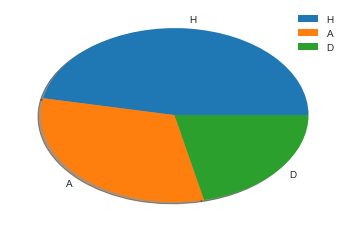

In [25]:
# How much of an advantage does the home team have in straight up wins?
results = df_match['result'].value_counts()
plt.pie(results, labels=results.index, shadow=True)
plt.legend()
plt.show()

As we all knew deep down, home field advantage is real! Make sure you cheer real loud next time you attend a local sporting event! Now let's get into the nitty-gritty analysis.

### Which offensive attributes are correlated with teams that covered the spread?
Let's see what offensive attributes lead to teams beating the betting odds.

In [26]:
df_match.columns

Index(['id', 'home_team_api_id', 'away_team_api_id', 'home_team_goal',
       'away_team_goal', 'goal', 'shoton', 'shotoff', 'foulcommit', 'card',
       'cross', 'corner', 'possession', 'B365H', 'B365D', 'B365A', 'result',
       'ATS', 'covered_spread_id', 'failed_spread_id',
       'covered_buildUpPlaySpeed', 'covered_buildUpPlaySpeedClass',
       'covered_buildUpPlayDribbling', 'covered_buildUpPlayDribblingClass',
       'covered_buildUpPlayPassing', 'covered_buildUpPlayPassingClass',
       'covered_buildUpPlayPositioningClass', 'covered_chanceCreationPassing',
       'covered_chanceCreationPassingClass', 'covered_chanceCreationCrossing',
       'covered_chanceCreationCrossingClass', 'covered_chanceCreationShooting',
       'covered_chanceCreationShootingClass',
       'covered_chanceCreationPositioningClass', 'covered_defencePressure',
       'covered_defencePressureClass', 'covered_defenceAggression',
       'covered_defenceAggressionClass', 'covered_defenceTeamWidth',
       '

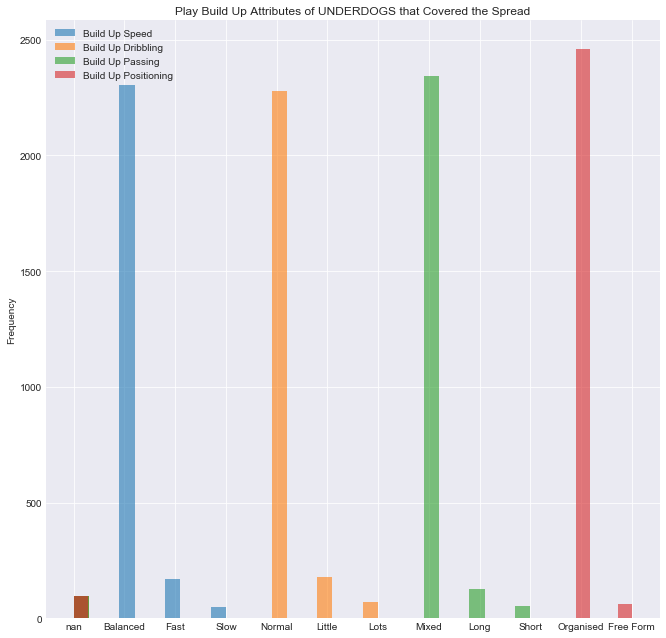

In [27]:
# Let's analyze some data for when underdogs cover the spread.
# Start with filtering the match dataframe.
underdog_mask = df_match['ATS'] == 'U'
df_underdog_win = df_match[underdog_mask]

# Then, plot offensive attributes in a histogram for underdogs
plt.figure(figsize=(11,11))
plt.hist(df_underdog_win['covered_buildUpPlaySpeedClass'], bins=10, label='Build Up Speed', alpha=0.6)
plt.hist(df_underdog_win['covered_buildUpPlayDribblingClass'], bins=20, label='Build Up Dribbling', alpha=0.6)
plt.hist(df_underdog_win['covered_buildUpPlayPassingClass'], bins=30, label='Build Up Passing', alpha=0.6)
plt.hist(df_underdog_win['covered_buildUpPlayPositioningClass'], bins=40, label='Build Up Positioning', alpha=0.6)
plt.legend()
plt.ylabel("Frequency")
plt.title("Play Build Up Attributes of UNDERDOGS that Covered the Spread")
plt.show()

Based on the above chart: Underdogs who cover the spread feature a mostly balanced attack, without too much long passing or excessive dribbling.

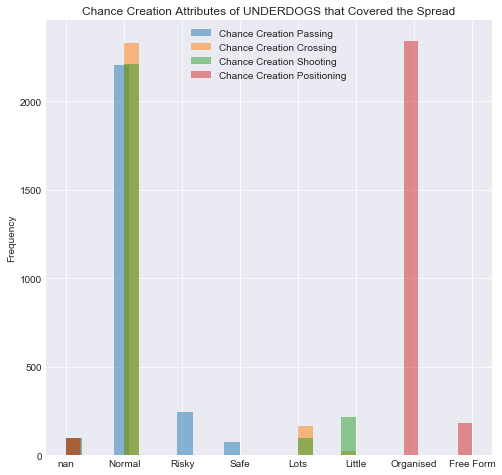

In [29]:
# Plot more offensive attributes in a histogram for underdogs
plt.figure(figsize=(8,8))
plt.hist(df_underdog_win['covered_chanceCreationPassingClass'], bins=11, label='Chance Creation Passing', alpha=0.5)
plt.hist(df_underdog_win['covered_chanceCreationCrossingClass'], bins=20, label='Chance Creation Crossing', alpha=0.5)
plt.hist(df_underdog_win['covered_chanceCreationShootingClass'], bins=20, label='Chance Creation Shooting', alpha=0.5)
plt.hist(df_underdog_win['covered_chanceCreationPositioningClass'], bins=30, label='Chance Creation Positioning', alpha=0.5)
plt.legend()
plt.ylabel("Frequency")
plt.title("Chance Creation Attributes of UNDERDOGS that Covered the Spread")
plt.show()

Based on the above chart: Underdogs who cover the spread take a few risky passes and sometimes play free form positioning during goal chance creation, but still remain mostly balanced.

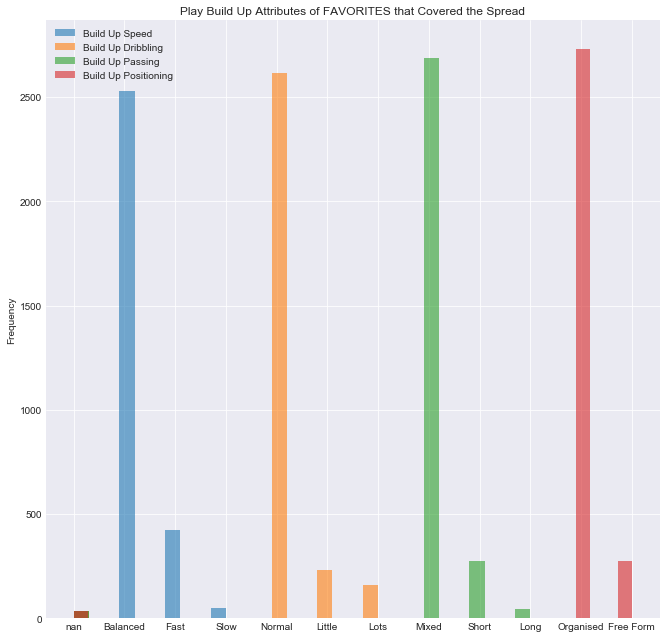

In [30]:
# Let's analyze some data for when favorites cover the spread.
# Start with filtering the match dataframe.
favorite_mask = df_match['ATS'] == 'F'
df_favorite_win = df_match[favorite_mask]

# Then, plot offensive attributes in a histogram for favorites
plt.figure(figsize=(11,11))
plt.hist(df_favorite_win['covered_buildUpPlaySpeedClass'], bins=10, label='Build Up Speed', alpha=0.6)
plt.hist(df_favorite_win['covered_buildUpPlayDribblingClass'], bins=20, label='Build Up Dribbling', alpha=0.6)
plt.hist(df_favorite_win['covered_buildUpPlayPassingClass'], bins=30, label='Build Up Passing', alpha=0.6)
plt.hist(df_favorite_win['covered_buildUpPlayPositioningClass'], bins=40, label='Build Up Positioning', alpha=0.6)
plt.legend()
plt.ylabel("Frequency")
plt.title("Play Build Up Attributes of FAVORITES that Covered the Spread")
plt.show()

Based on the above chart: During play build-up, favorites who covered the spread like to sometimes play at a higher tempo, with more dribbling, and with more lenient positioning than underdogs.

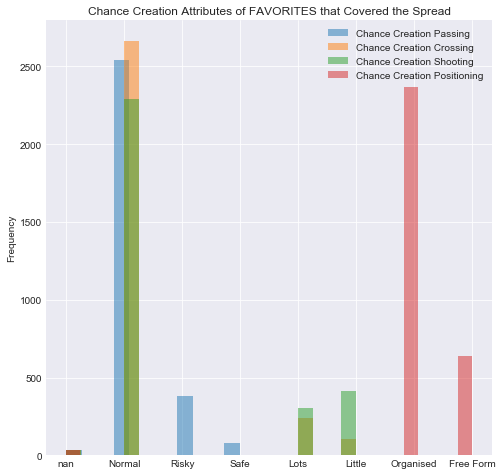

In [31]:
# Plot more offensive attributes in a histogram for favorites
plt.figure(figsize=(8,8))
plt.hist(df_favorite_win['covered_chanceCreationPassingClass'], bins=11, label='Chance Creation Passing', alpha=0.5)
plt.hist(df_favorite_win['covered_chanceCreationCrossingClass'], bins=20, label='Chance Creation Crossing', alpha=0.5)
plt.hist(df_favorite_win['covered_chanceCreationShootingClass'], bins=20, label='Chance Creation Shooting', alpha=0.5)
plt.hist(df_favorite_win['covered_chanceCreationPositioningClass'], bins=30, label='Chance Creation Positioning', alpha=0.5)
plt.legend()
plt.ylabel("Frequency")
plt.title("Chance Creation Attributes of FAVORITES that Covered the Spread")
plt.show()

Based on the above chart: During goal chance creation, favorites who covered the spread take riskier passes, more shots, and have much more free form positioning than underdogs.

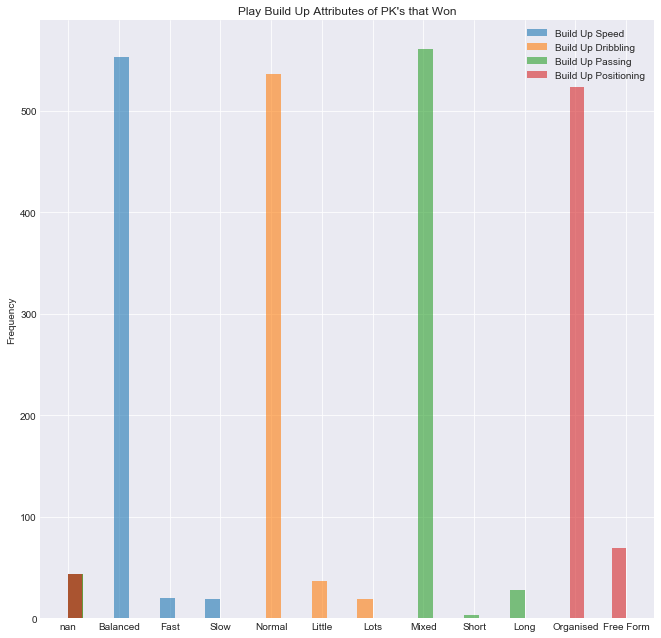

In [32]:
# Let's analyze some data for when PK's (evenly matched teams) win.
# Start with filtering the match dataframe.
pk_mask = df_match['ATS'].str.contains('PK', na=False)
df_pk_win = df_match[pk_mask]

# Then, plot offensive attributes in a histogram for PK's that won
plt.figure(figsize=(11,11))
plt.hist(df_pk_win['covered_buildUpPlaySpeedClass'], bins=10, label='Build Up Speed', alpha=0.6)
plt.hist(df_pk_win['covered_buildUpPlayDribblingClass'], bins=20, label='Build Up Dribbling', alpha=0.6)
plt.hist(df_pk_win['covered_buildUpPlayPassingClass'], bins=30, label='Build Up Passing', alpha=0.6)
plt.hist(df_pk_win['covered_buildUpPlayPositioningClass'], bins=40, label='Build Up Positioning', alpha=0.6)
plt.legend()
plt.ylabel("Frequency")
plt.title("Play Build Up Attributes of PK's that Won")
plt.show()

Based on the above chart: PK's that won have a pretty balanced attack. They don't play very fast or dribble much, but they do sometimes take longer passes and play with free-form positioning. 

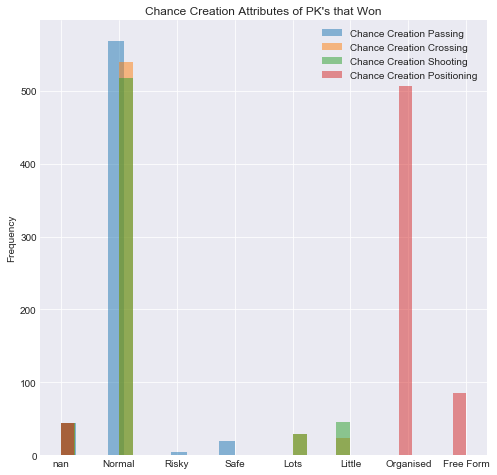

In [33]:
# Plot more offensive attributes in a histogram for PK's that won
plt.figure(figsize=(8,8))
plt.hist(df_pk_win['covered_chanceCreationPassingClass'], bins=11, label='Chance Creation Passing', alpha=0.5)
plt.hist(df_pk_win['covered_chanceCreationCrossingClass'], bins=20, label='Chance Creation Crossing', alpha=0.5)
plt.hist(df_pk_win['covered_chanceCreationShootingClass'], bins=20, label='Chance Creation Shooting', alpha=0.5)
plt.hist(df_pk_win['covered_chanceCreationPositioningClass'], bins=30, label='Chance Creation Positioning', alpha=0.5)
plt.legend()
plt.ylabel("Frequency")
plt.title("Chance Creation Attributes of PK's that Won")
plt.show()

Based on the above chart: When creating chances for goals, PK's that won kept their game pretty risk-free. They didn't take risky passes and they didn't shoot a whole lot. They at least occassionally took a few risks, though, with their positioning.

### Which defensive attributes are correlated with teams that covered the spread?
Let's see what defensive attributes lead to teams beating the betting odds.

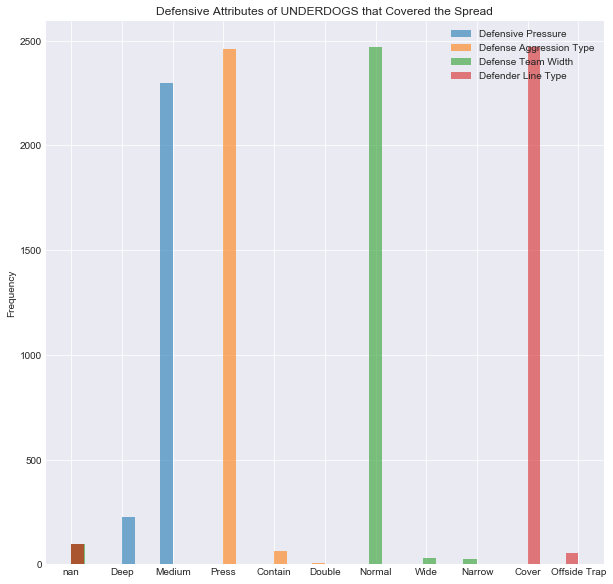

In [34]:
# Let's do the same exact thing we did above, except with defensive attributes instead.

# Plot defensive attributes in a histogram for underdogs
plt.figure(figsize=(10,10))
plt.hist(df_underdog_win['covered_defencePressureClass'], bins=8, label='Defensive Pressure', alpha=0.6)
plt.hist(df_underdog_win['covered_defenceAggressionClass'], bins=20, label='Defense Aggression Type', alpha=0.6)
plt.hist(df_underdog_win['covered_defenceTeamWidthClass'], bins=30, label='Defense Team Width', alpha=0.6)
plt.hist(df_underdog_win['covered_defenceDefenderLineClass'], bins=40, label='Defender Line Type', alpha=0.6)
plt.legend()
plt.ylabel("Frequency")
plt.title("Defensive Attributes of UNDERDOGS that Covered the Spread")
plt.show()

Based on the above chart: Underdogs that covered the spread had a balanced, mostly risk-free defense. There was no pressure applied at all to the other side of the field, there was hardly any ultra-aggression such as double-teams, and the team placed themselves evenly across the field.

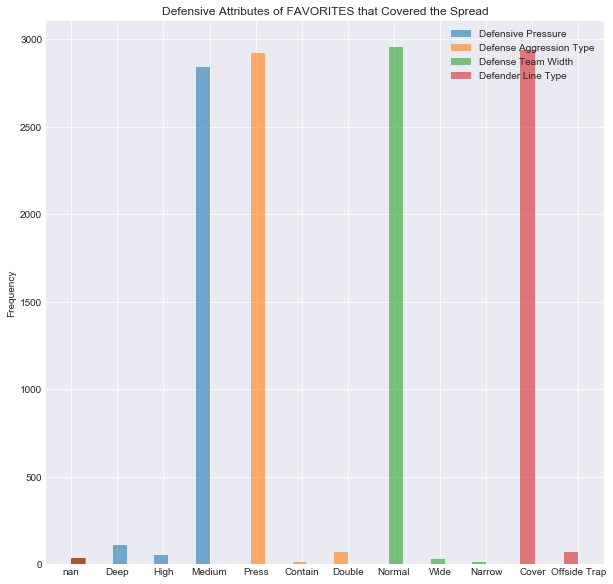

In [35]:
# Plot defensive attributes in a histogram for favorites
plt.figure(figsize=(10,10))
plt.hist(df_favorite_win['covered_defencePressureClass'], bins=10, label='Defensive Pressure', alpha=0.6)
plt.hist(df_favorite_win['covered_defenceAggressionClass'], bins=20, label='Defense Aggression Type', alpha=0.6)
plt.hist(df_favorite_win['covered_defenceTeamWidthClass'], bins=30, label='Defense Team Width', alpha=0.6)
plt.hist(df_favorite_win['covered_defenceDefenderLineClass'], bins=35, label='Defender Line Type', alpha=0.6)
plt.legend()
plt.ylabel("Frequency")
plt.title("Defensive Attributes of FAVORITES that Covered the Spread")
plt.show()

Based on the above chart: Favorites that covered the spread had a more aggressive defense, maybe because they are able to tolerate and fix mistakes better than underdogs. They applied some pressure on the other side of the field, and sometimes were ultra-aggressive when tackling. Interestingly, though, they had a similar amount of offside traps as underdogs who covered the spread, suggesting that it is an effective tactic for any team.

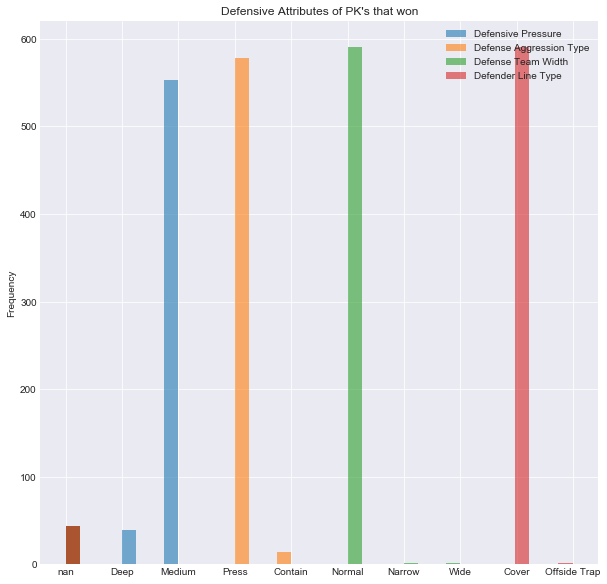

In [36]:
# Plot defensive attributes in a histogram for PK's that won
plt.figure(figsize=(10,10))
plt.hist(df_pk_win['covered_defencePressureClass'], bins=8, label='Defensive Pressure', alpha=0.6)
plt.hist(df_pk_win['covered_defenceAggressionClass'], bins=16, label='Defense Aggression Type', alpha=0.6)
plt.hist(df_pk_win['covered_defenceTeamWidthClass'], bins=28, label='Defense Team Width', alpha=0.6)
plt.hist(df_pk_win['covered_defenceDefenderLineClass'], bins=35, label='Defender Line Type', alpha=0.6)
plt.legend()
plt.ylabel("Frequency")
plt.title("Defensive Attributes of PK's that won")
plt.show()

Based on the above chart: PK's that won play very conservative defense. No pressure at all on the opposide side of the field, relatively high pressure on their OWN side of the field, no ultra-aggressive tackling at all, no offside traps at all, and extremely even team placement.

### How do opposing attributes stack up to each other?
Let's see how a few attributes from winning and losing teams fare against each other. What I will do here is compare attributes of teams that covered the spread versus attributes of teams that did not cover the spread. The attributes I will compare will be the types that would be directly opposing each other on the soccer field. Also, I will be looking at all matches in general, instead of filtering by the type of team that covered the spread.

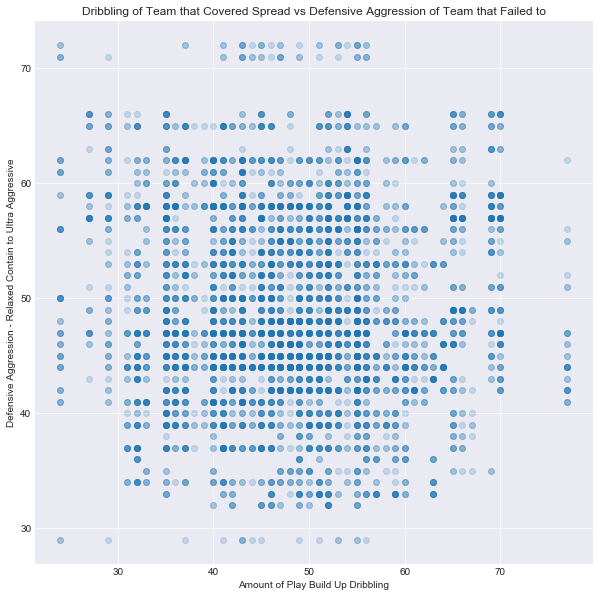

In [37]:
# Let's see how the dribbling of the team that covered the spread compares to the defensive aggression of the
# team that did not cover the spread. The dribbling ranges 0-100, with low numbers representing little dribbling
# during play build up, and high numbers representing a lot of dribbling during play build up. The defensive 
# aggression also ranges from 0-100. Here, low numbers represent a contain attitude, where the defender simply 
# tries to stay in front of an attacker at all times. Mid numbers represent a press attitude, where the defender tries to stay in front of the
# attacker most of the time but takes risks when the time is right to try and steal the ball. High numbers represent 
# ultra-aggressive defense such as constantly tackling the ball or double-teaming.

plt.figure(figsize=(10,10))
plt.scatter(df_match["covered_buildUpPlayDribbling"], df_match["failed_defenceAggression"], alpha=0.2)
plt.title("Dribbling of Team that Covered Spread vs Defensive Aggression of Team that Failed to")
plt.xlabel("Amount of Play Build Up Dribbling")
plt.ylabel("Defensive Aggression - Relaxed Contain to Ultra Aggressive")
plt.show()

Based on the above chart: these attributes are mostly evenly distributed, but we can see a few subtle patterns on the corners and edges, as explained in the conclusions below. We will pay particular attention to high dribbling (right side of the graph), and ultra-aggressive defense (top of the graph).

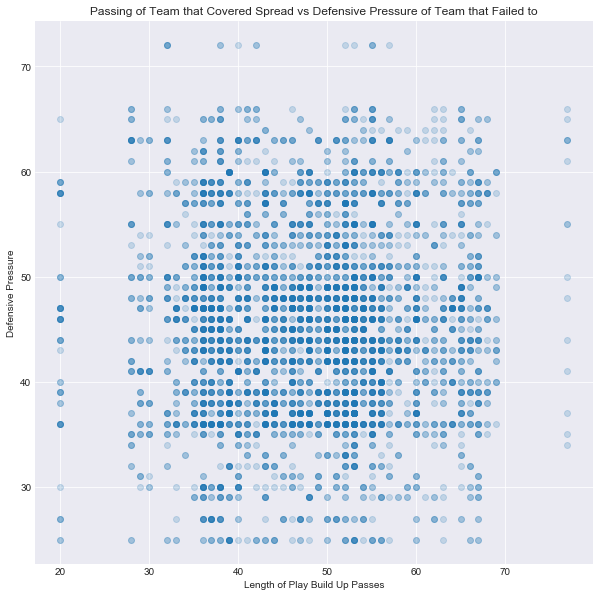

In [38]:
# Next let's see how the passing of the team that covered the spread compares to the defensive pressure of the
# team that did not cover the spread. Build up play passing ranges from 0-100, with low numbers representing 
# short passing and high numbers representing long passing. Defensive pressure also ranges from 0-100, with low numbers
# representing defensive pressure on the defending team's own side, and high numbers representing defensive pressure
# on the opponent's side of the field.

plt.figure(figsize=(10,10))
plt.scatter(df_match["covered_buildUpPlayPassing"], df_match["failed_defencePressure"], alpha=0.2)
plt.title("Passing of Team that Covered Spread vs Defensive Pressure of Team that Failed to")
plt.xlabel("Length of Play Build Up Passes")
plt.ylabel("Defensive Pressure")
plt.show()

Based on the above chart: these attributes are mostly evenly distributed, but we can see a few subtle patterns on the edges. Mixed-length passing is clearly the winner here, and if a team deviated from this, far more teams that used mostly short passing (left of graph) covered the spread than teams who used mostly long passing (right of graph). 

Now I will switch it up, and compare the defense of the team that covered the spread versus the offense of the team that did not cover the spread.

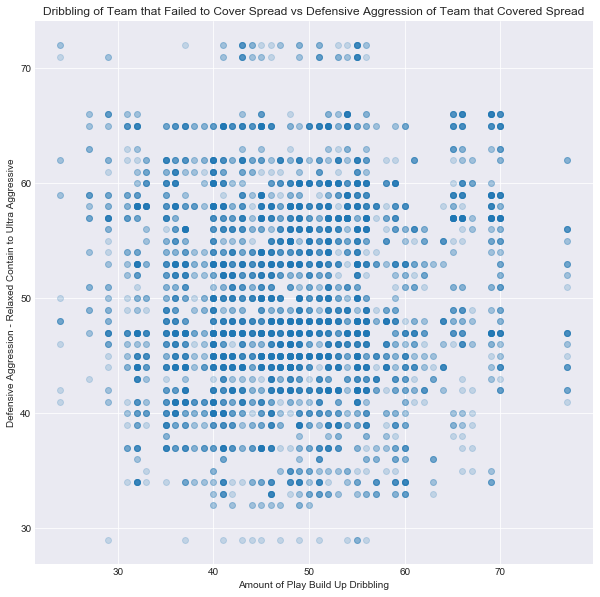

In [39]:
# Let's see how the dribbling of the team that did NOT cover the spread compares to the defensive aggression of the
# team that DID cover the spread.

plt.figure(figsize=(10,10))
plt.scatter(df_match["failed_buildUpPlayDribbling"], df_match["covered_defenceAggression"], alpha=0.2)
plt.title("Dribbling of Team that Failed to Cover Spread vs Defensive Aggression of Team that Covered Spread")
plt.xlabel("Amount of Play Build Up Dribbling")
plt.ylabel("Defensive Aggression - Relaxed Contain to Ultra Aggressive")
plt.show()

Based on the above chart: these attributes are mostly evenly distributed, but we can see a few subtle patterns on the edges. Mixed-aggression defense is clearly the winner here, and if a team deviated from this, far more teams that used ultra-aggressive defense (top of graph) covered the spread than teams who used mostly a contain defense (bottom of graph).

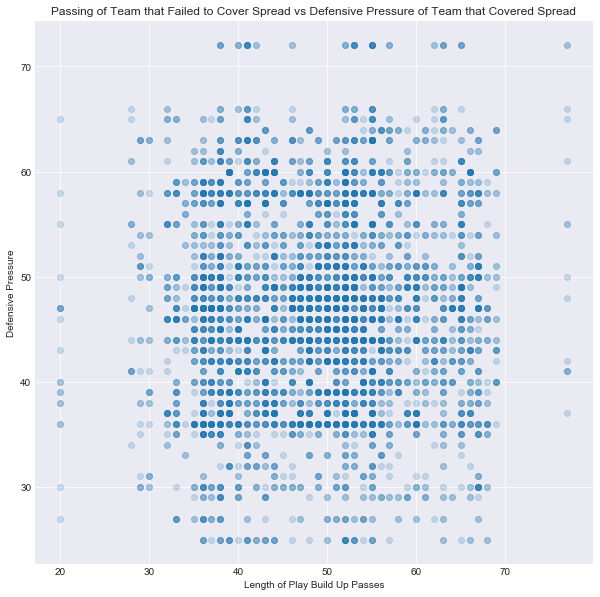

In [40]:
# Lastly, let's see how the passing of the team that did NOT cover the spread compares to the defensive pressure of the
# team that DID cover the spread.

plt.figure(figsize=(10,10))
plt.scatter(df_match["failed_buildUpPlayPassing"], df_match["covered_defencePressure"], alpha=0.2)
plt.title("Passing of Team that Failed to Cover Spread vs Defensive Pressure of Team that Covered Spread")
plt.xlabel("Length of Play Build Up Passes")
plt.ylabel("Defensive Pressure")
plt.show()

Based on the above chart: these attributes are mostly evenly distributed, but we can see a few subtle patterns on the edges. Applying defensive pressure on the opposite side of the field (top of graph) is clearly not as effective as applying defensive pressure on your own side of the field (bottom of graph). We will explore why below.

<a id='conclusions'></a>
## Conclusions

**Regarding the first question**, favorites are clearly taking far more risks than underdogs on offense. We see these risks in multiple places: A) During play build up, favorites dribble more, execute at a higher speed, and have a much more free form organization. B) During goal chance creation, favorites are making riskier passes, crossing more, shooting more, and playing with more free form position. We can see that risky play is correlated with favorites covering the spread, but a question that deserves to be explored more is: Do favorites take risks because they know they're better to begin with, or do they cover the spread as favorites BECAUSE they take more risks?

**Regarding the second question**, we can also see favorites taking more risks than underdogs on defense. Once again we see this in multiple places: A) more aggression in situations like double-teaming, and B) defensive pressure applied higher up on the field. At least underdogs took a similar amount of risks with offside traps, though. 

An interesting thing to note: when teams were evenly matched (PKs), they hardly ever made risky passes or played at an above-average tempo on offense. On defense, same exact story: evenly matched teams that won didn't do anything risky such as applying pressure on the opposite side of the field, double-teaming attackers, or using offside traps. On average, evenly matched teams seem to pull out wins by playing conservatively.

**Regarding the third question**, the graphs comparing attributes are difficult to extract broad correlations from. The data is very evenly distributed. Knowing the sport of soccer decently well, though, I can see a few subtle patterns start to emerge. A) Dribbling excessively does not bode well. (Unless you are some sort of superstar.) In the first graph, you can see that teams that dribbled far more than average only managed to cover the spread when the defensive aggression was more relaxed than average. What further supports this theory is that when the defensive aggression was ultra-aggressive, teams only managed to cover the spread against them with either an average amount of dribbling or lower than average amount of dribbling, meaning they were probably making quick passes to avoid the feisty defense. B) Long passes are risky. In the second graph, you can see that far more teams that made shorter-than-average passes covered the spread than teams that made longer-than-average passes. C) Based on the third graph, it seems that a Press type defense (where a team mostly contains but aggressively tackles when the situation calls for it) is the most effective overall. If a team happens to deviate from this type of defense, and either excessively contains or excessively tackles, it seems that ultra-aggressive tackling leads to covering the spread more. Never relax too much; stay aggressive! D) The fourth graph suggests a very interesting pattern. Defensive pressure applied on the defending team's own side of the field helps that team cover the spread far more than applying defensive pressure toward the opposite side of the field. Could it be because high-pressure defense all around the field tires teams out physically? Or could it be that a team who's charging for the ball far into the opponent's side of the field, is doing so simply because they are already losing?

All the unanswered questions above are for another report, another time. Hope you enjoyed!

### Limitations

There were undoubtedly a couple limitations in my analysis. First of all, I wasn't able to use the entire dataset of soccer matches. There was too much of a mismatch between match data and team attributes data by specific dates. For example - there was a match between two teams that occurred in 2008, but the team attributes table did not have attributes for either of those teams until 2010. So I used only data from the 2014-2015 and 2015-2016 seasons, for both the match data and team attribute data. Secondly, there were a few null values in one or two team attributes for a few teams. I decided to just ignore these and proceed, because it did not hinder my analysis. 

<a id='endnotes'></a>
## Endnotes

How did I decide that a delta of 0.75 in betting odds is significant enough to declare a clear favorite and underdog, where a match draw results in an ATS win for the underdog? I used this table from www.pinnacle.com, which converts European odds to American odds. Then I simply viewed betting lines on sports.bovada.lv to see what kind of American odds are enough to create clear-cut favorites and underdogs, where a draw would be an ATS win for the underdog.

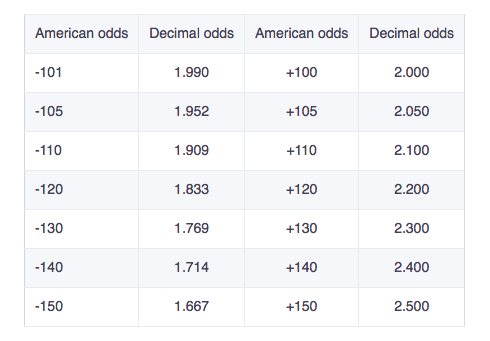